In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset manipulation

In [40]:
# n1_x,n1_y,n2_x,n2_y,n3_x,n3_y,n4_x,n4_y,avg_Q,min_Q,target_length,total_nodes, all the other nodes
dataset_path = "data/structured_mesh_25_nodes_data.csv"

df = pd.read_csv(dataset_path, header=None)
# Avg quality above 0.75, min quality above 0.5
df = df[df.iloc[:, 8] > 0.75]
dataset = df[df.iloc[:, 9] > 0.5]

training = dataset.sample(frac=0.85)
testing = dataset.drop(training.index)

train_features = training.iloc[:, :8]
train_labels = training.iloc[:, 12:]

test_features = testing.iloc[:, :8]
test_labels = testing.iloc[:, 12:]


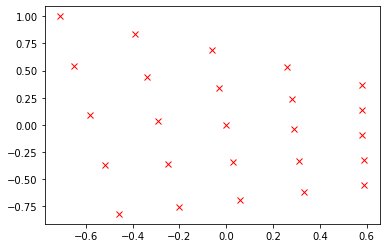

In [41]:
# ======================
#        PLOTTING
# ======================

x_plot = []
y_plot = []
for i in range(0, len(test_plot), 2):
    x_plot.append(test_plot[i])
    y_plot.append(test_plot[i+1])

plt.plot(x_plot, y_plot, 'rx')

In [42]:
# ======================
#       MODEL STUFF
# ======================
model_path = "model/structured_mesh_25_nodes"

LEARNING_RATE = 1e-2
WEIGHT_DECAY = 1e-2
BATCH_SIZE = 64
EPOCHS = 500

def model_setup():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(8,)),
        layers.BatchNormalization(),

        layers.Dense(24),
        layers.Activation('relu'),
        layers.BatchNormalization(),

        layers.Dense(36),
        layers.Activation('relu'),
        layers.BatchNormalization(),

        layers.Dense(50),
    ])

    return model

model = model_setup()

decay_steps= 10_000
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(LEARNING_RATE, decay_steps, 1e-3)

model.compile(loss=tf.losses.MeanAbsoluteError(),
              optimizer=tf.optimizers.Adam(
                  learning_rate=lr_schedule,
              ),
              )

checkpoint = tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', min_delta='0.001')
callbacks_list = [checkpoint, early_stopping]
history = model.fit(train_features,
                    train_labels,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.18,
                    verbose=2,
                    callbacks=callbacks_list,
                    )

# ======================
#       EVALUATION
# ======================
train_acc = model.evaluate(
    train_features, train_labels, verbose=0)
test_acc = model.evaluate(
    test_features, test_labels, verbose=0)
print('Training data loss: %.3f, Test data loss: %.3f' %
        (train_acc, test_acc))

# plot history
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


NameError: name 'layers' is not defined